In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
boston=pd.read_csv("articulos_ml.csv")
#print(boston)

In [3]:
print(boston.keys())


Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')


In [178]:
#boston.describe() # columnas para DAtos Estadisticos

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,...,INMUSUPR,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
count,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,...,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000,303461.000000
mean,151730.000000,9.675322,14.891867,1.510586,15.178161,1.232349,74.922778,1.835142,42.606776,1.007115,...,2.352566,2.172965,2.447550,2.319023,2.174424,2.312686,2.262933,32.044886,1.814246,74.921301
std,87601.789357,7.766512,7.986825,0.499889,7.888795,0.422331,40.146792,0.597460,16.804656,0.084048,...,5.959690,5.723109,6.793264,5.741573,5.722937,5.656328,5.815630,45.256824,0.668555,40.149882
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,75865.000000,4.000000,9.000000,1.000000,9.000000,1.000000,97.000000,2.000000,31.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,151730.000000,12.000000,14.000000,2.000000,15.000000,1.000000,97.000000,2.000000,41.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,227595.000000,12.000000,21.000000,2.000000,21.000000,1.000000,97.000000,2.000000,53.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,303460.000000,99.000000,32.000000,2.000000,32.000000,2.000000,99.000000,99.000000,120.000000,2.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [196]:
X_polinom=boston[['DIABETES']] #cargamo valor de x1 en data
#X_polinom=boston.iloc[:,np.newaxis,3]
print(X_polinom)

        DIABETES
0              2
1              2
2              2
3              2
4              1
...          ...
303456         2
303457         2
303458         2
303459         1
303460         2

[303461 rows x 1 columns]


In [197]:
y_polinom=boston.EDAD
print(y_polinom)

0         86
1         58
2         52
3         47
4         26
          ..
303456    38
303457    40
303458    21
303459    53
303460    28
Name: EDAD, Length: 303461, dtype: int64


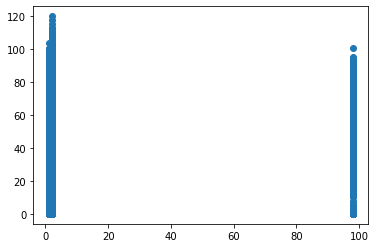

In [198]:
plt.scatter(X_polinom,y_polinom)

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_polinom, y_polinom, test_size=0.2)

In [200]:
#definicion del grado del polinomio de grado tallll 
from sklearn.preprocessing import PolynomialFeatures
polinomial_regr = PolynomialFeatures(degree=5)

In [201]:
x_train_poli = polinomial_regr.fit_transform(X_train)
x_test_poli = polinomial_regr.fit_transform(X_test)

In [202]:
pr= linear_model.LinearRegression()

In [203]:
#entrenamos el modelo
pr.fit(x_train_poli, y_train)

LinearRegression()

In [204]:
#hacerprediccion
y_pred=pr.predict(x_test_poli)
#print(y_test)
print(y_pred)

[40.46715194 40.46715194 40.46715194 ... 40.46715194 40.46715194
 40.46715194]


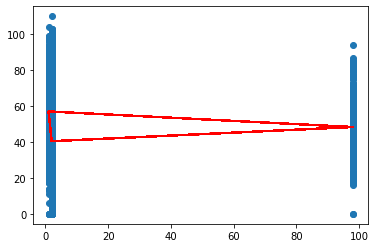

In [205]:
#dibujamos
plt.scatter (X_test, y_test)
plt.plot(X_test, y_pred, color ='red')
plt.show()

In [206]:
print("Valor de la pendiente")
print(pr.coef_)

Valor de la pendiente
[  0.           3.48205171  10.44212881  24.64358762 -15.24124595
   0.15294582]


In [207]:
print("Valor de la Interseccion")
print(pr.intercept_)

Valor de la Interseccion
33.55150150564944


In [208]:
print("Valor de la Interseccion")
print(pr.score(x_train_poli,y_train))

Valor de la Interseccion
0.10844444716508794


In [192]:
print("Y=",pr.coef_[1],"x1 +",pr.coef_[2],"x2 +",pr.coef_[3])

Y= 0.01924465886415686 x1 + -0.000535489418889254 x2 + 4.792365502013762e-06
